## **Introduction**

The connection between height and weight is a key element in understanding human biology and health. By exploring the correlation between these two variables, we can gain valuable insights into growth trends, nutritional health, and potential risks for certain medical conditions. This project focuses on analyzing the relationship between height and weight through statistical methods and machine learning models. The goal is to develop predictive models that can accurately estimate weight based on height, offering useful tools for healthcare professionals and researchers alike.

## **Real-World Applications**

In everyday life, understanding the link between height and weight plays an important role across several fields:

- **Healthcare**: Doctors rely on height and weight to calculate Body Mass Index (BMI), a key measure for identifying obesity or malnutrition. With accurate prediction models, they can better track children’s growth, diagnose health issues, and create more personalized care plans for patients.

- **Nutrition**: Nutritionists use height and weight to craft tailored diet plans. Predictive models can make this process even more precise, helping to recommend the right calorie intake and nutritional needs based on a person’s height.

- **Fitness and Wellness**: Trainers and fitness experts use height and weight to design personalized workout routines. Predictive tools can further refine these plans, offering more accurate health and fitness assessments to meet individual goals.

## **Domain Application**

- **Public Health**: By studying trends in height and weight, we can better understand issues like obesity or undernutrition in populations, helping to design effective health interventions.

- **Sports Science**: This data helps create personalized training and nutrition plans for athletes, boosting performance and promoting overall health.

- **Pediatrics**: Monitoring the growth of children through these metrics ensures they are developing as expected, allowing for early detection of potential health concerns.

## **Conclusion**

In conclusion, this project seeks to develop accurate predictive models by analyzing the relationship between height and weight. These models can be applied across healthcare, nutrition, and public health, offering valuable insights and practical tools to improve health assessments and interventions. By leveraging advanced tools and libraries, the project aims to contribute meaningful solutions to support better health outcomes.

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the data
df = pd.read_csv('weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
# Converting weight pounds to kg (1 pound = 0.453592 kg)
df['Weight'] = df['Weight'] * 0.454
df['Height'] = df['Height'] * 2.54

In [6]:
df.head()

,Gender,Height,Weight
0,Male,187.571423,109.819678
1,Male,174.706036,73.688955
2,Male,188.239668,96.584348
3,Male,182.196685,99.899282
4,Male,177.499761,93.682809


In [7]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

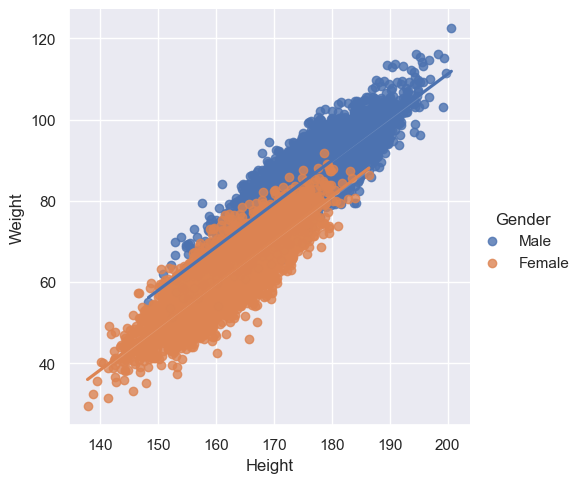

In [14]:
sns.lmplot(x='Height', y="Weight", hue='Gender', data = df)
plt.show()

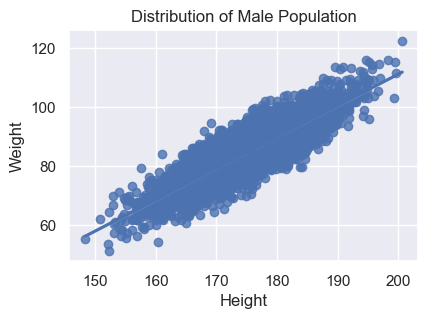

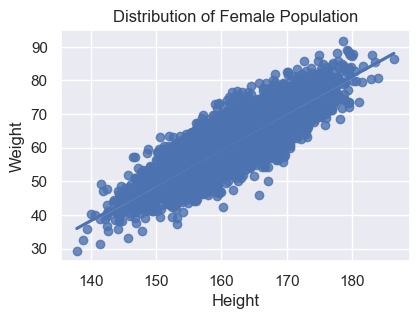

In [22]:
df_male = df.loc[df['Gender'] == 'Male']
df_female = df.loc[df['Gender'] == 'Female']

sns.regplot(x = df_male['Height'], y = df_male['Weight'])
plt.title('Distribution of Male Population')
plt.show()

plt.title('Distribution of Female Population')
sns.regplot(x = df_female['Height'], y = df_female['Weight'])
plt.show()


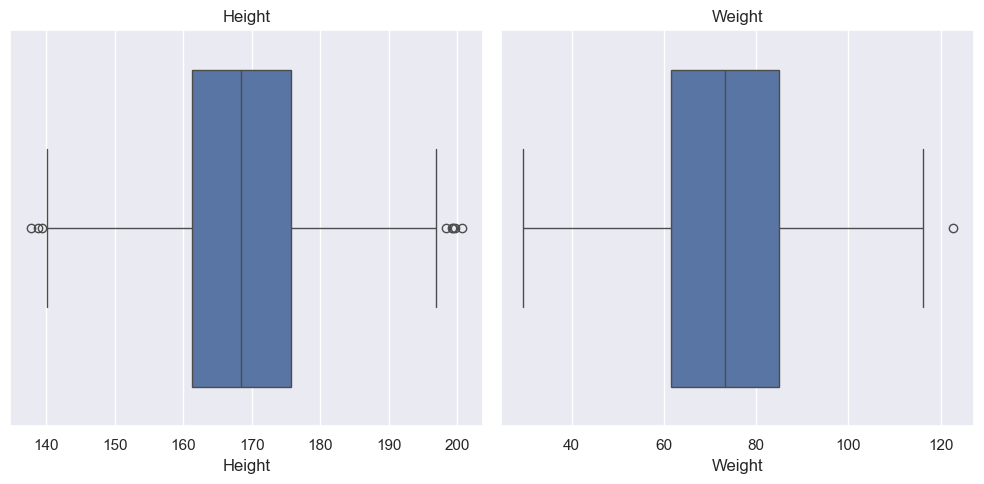

In [33]:
# Data Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Height'])
plt.title("Height")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Weight'])
plt.title("Weight")
plt.tight_layout()
plt.show()

In [16]:
df

,Gender,Height,Weight
0,Male,187.571423,109.819678
1,Male,174.706036,73.688955
2,Male,188.239668,96.584348
3,Male,182.196685,99.899282
4,Male,177.499761,93.682809
...,...,...,...
9995,Female,168.078536,62.096964
9996,Female,170.350573,77.574029
9997,Female,162.224700,58.327795
9998,Female,175.346978,74.389017


In [17]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

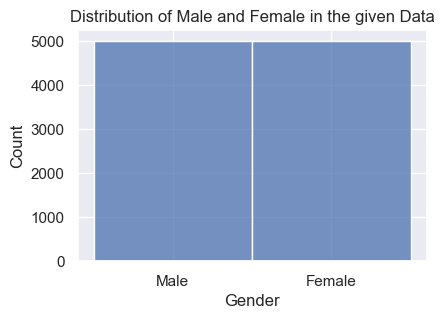

In [18]:
sns.histplot(df['Gender'])
plt.title("Distribution of Male and Female in the given Data")
plt.show()

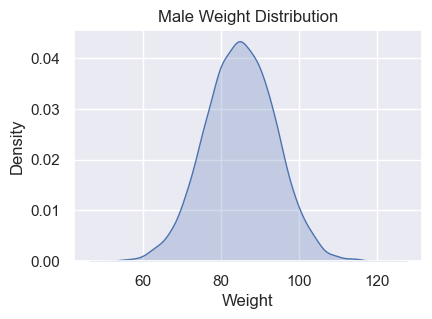

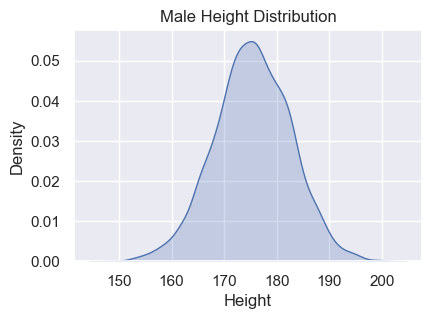

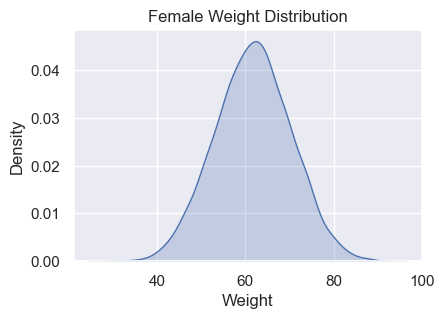

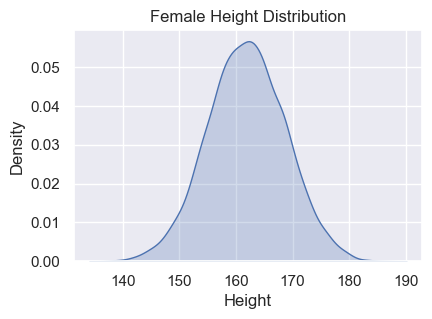

In [19]:
sns.set(rc={"figure.figsize":(4.5, 3)})
sns.kdeplot(data=df_male['Weight'], shade=True)
plt.title("Male Weight Distribution")
plt.show()
sns.kdeplot(data=df_male['Height'], shade=True)
plt.title("Male Height Distribution")
plt.show()
sns.kdeplot(data=df_female['Weight'], shade=True)
plt.title("Female Weight Distribution")
plt.show()
sns.kdeplot(data=df_female['Height'], shade=True)
plt.title("Female Height Distribution")
plt.show()

In [25]:
y_male = df_male['Weight']
y_female = df_female['Weight']

df_male.drop(['Weight', 'Gender'], axis = 1, inplace = True)
df_female.drop(['Weight', 'Gender'], axis = 1, inplace = True)

In [26]:
x_male_train, x_male_test, y_male_train,  y_male_test = train_test_split(df_male, y_male, test_size=0.2, random_state = 0)
x_female_train, x_female_test, y_female_train, y_female_test  = train_test_split(df_female, y_female, test_size=0.2, random_state = 0)

In [27]:
# Training the Linear Regression Model

lr_male = LinearRegression()
lr_male.fit(x_male_train, y_male_train)
train_pred_male = lr_male.predict(x_male_train)
test_pred_male = lr_male.predict(x_male_test)

lr_female = LinearRegression()
lr_female.fit(x_female_train, y_female_train)
train_pred_female = lr_female.predict(x_female_train)
test_pred_female = lr_female.predict(x_female_test)

In [28]:
import math
from math import sqrt

rmse_train_male = sqrt(mean_squared_error(y_male_train, train_pred_male))
rmse_test_male = sqrt(mean_squared_error(y_male_test, test_pred_male))

print("The value of RMSE on training model for male weight is :")
print(rmse_train_male)
print("And the value of RMSE on the testing data is :")
print(rmse_test_male)

The value of RMSE on training model for male weight is :
4.5403598322673355
And the value of RMSE on the testing data is :
4.523439244399997


In [30]:
rmse_train_female = sqrt(mean_squared_error(y_female_train,train_pred_female))
rmse_test_female = sqrt(mean_squared_error(y_female_test,test_pred_female))

print("The value of RMSE on training model for female weight is :")
print(rmse_train_female)
print("And the value of RMSE on the testing data is :")
print(rmse_test_female)

The value of RMSE on training model for female weight is :
4.568018761979679
And the value of RMSE on the testing data is :
4.500079073925019


BMI, or Body Mass Index, is a simple measure used to estimate whether a person has a healthy body weight for their height. It is calculated using the following formula:

​BMI = (Weight (in Kg))/(Height(in m))^2


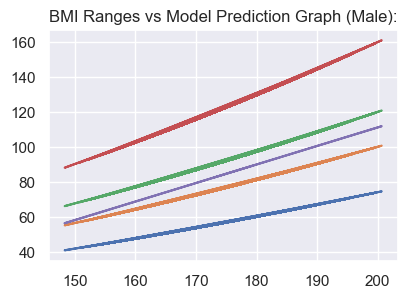

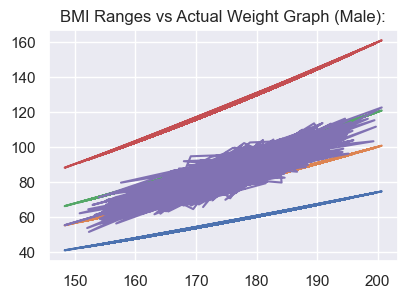

In [31]:
# Plotting the BMI range and the model prediction graph for male

# BMI = (Weight (in Kg))/(Height^2 (in m^2))
# Weight = (BMI * (Height^2))
# y = a x^2 relation 
# y = 10^(-4)*x^2

x = x_male_train
plt.plot(x, 18.5*(10**(-4))*(x**2)) 
plt.plot(x, 25*(10**(-4))*(x**2)) 
plt.plot(x, 30*(10**(-4))*(x**2)) 
plt.plot(x, 40*(10**(-4))*(x**2)) 
plt.plot(x,train_pred_male)
plt.title("BMI Ranges vs Model Prediction Graph (Male):")
plt.show()

plt.plot(x, 18.5*(10**(-4))*(x**2)) 
plt.plot(x, 25*(10**(-4))*(x**2)) 
plt.plot(x, 30*(10**(-4))*(x**2)) 
plt.plot(x, 40*(10**(-4))*(x**2)) 
plt.plot(x,y_male_train)
plt.title("BMI Ranges vs Actual Weight Graph (Male):")
plt.show()

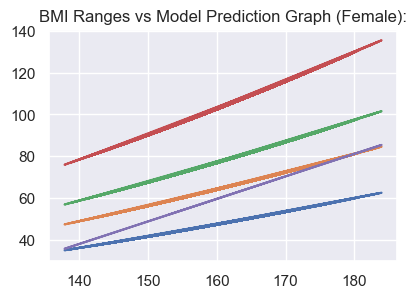

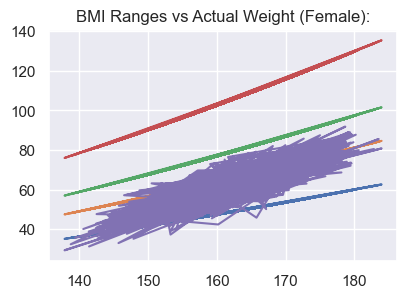

In [32]:
# Plotting the BMI range and the model prediction graph for female

x = x_female_train
plt.plot(x, 18.5*(10**(-4))*(x**2)) 
plt.plot(x, 25*(10**(-4))*(x**2)) 
plt.plot(x, 30*(10**(-4))*(x**2)) 
plt.plot(x, 40*(10**(-4))*(x**2)) 
plt.plot(x,train_pred_female)
plt.title("BMI Ranges vs Model Prediction Graph (Female):")
plt.show()

plt.plot(x, 18.5*(10**(-4))*(x**2)) 
plt.plot(x, 25*(10**(-4))*(x**2)) 
plt.plot(x, 30*(10**(-4))*(x**2)) 
plt.plot(x, 40*(10**(-4))*(x**2)) 
plt.plot(x,y_female_train)
plt.title("BMI Ranges vs Actual Weight (Female):")
plt.show()

In [36]:
import pickle

# Saving the male model
with open('linear_regression_male_model.pkl', 'wb') as file:
    pickle.dump(lr_male, file)

# Saving the female model
with open('linear_regression_female_model.pkl', 'wb') as file:
    pickle.dump(lr_female, file)

print("Models saved successfully.")


Models saved successfully.
